## Import the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing the data set

In [19]:
np.set_printoptions(precision=2)

In [20]:
df = pd.read_csv("C:/Users/user/Python/Jupiter_notebooks/diabetes.csv")

In [21]:
df = df.dropna(how="any", axis=0) 

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Check correlation with heatmap graph

<AxesSubplot:>

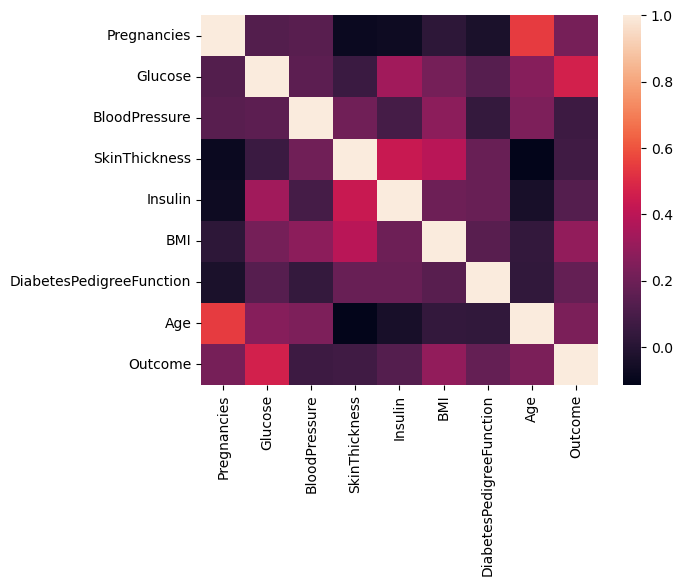

In [25]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)

## Splitting the dataset into training set and test set

In [10]:
labels=df['Outcome']
features = df.iloc[:,1:8]
from sklearn.model_selection import train_test_split
X=features
y=np.ravel(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

## Transform data in the same scale

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## The Keras sequential model

##### The code below created a Keras sequential model, which means building up the layers in the neural network by adding them one at a time

In [59]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(7,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [60]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
H=model.fit(X_train, y_train,validation_split=0.33,epochs=30, batch_size=1, verbose=1)
print(H.history.keys())

Epoch 1/30
344/344 [==============================] - 6s 16ms/step - loss: 0.5703 - accuracy: 0.7064 - val_loss: 0.5499 - val_accuracy: 0.7000
Epoch 2/30
344/344 [==============================] - 2s 5ms/step - loss: 0.4947 - accuracy: 0.7703 - val_loss: 0.5187 - val_accuracy: 0.7353
Epoch 3/30
344/344 [==============================] - 2s 5ms/step - loss: 0.4654 - accuracy: 0.7820 - val_loss: 0.5022 - val_accuracy: 0.7471
Epoch 4/30
344/344 [==============================] - 2s 5ms/step - loss: 0.4494 - accuracy: 0.7878 - val_loss: 0.4922 - val_accuracy: 0.7529
Epoch 5/30
344/344 [==============================] - 2s 4ms/step - loss: 0.4322 - accuracy: 0.7965 - val_loss: 0.4980 - val_accuracy: 0.7529
Epoch 6/30
344/344 [==============================] - 2s 4ms/step - loss: 0.4227 - accuracy: 0.7791 - val_loss: 0.4905 - val_accuracy: 0.7588
Epoch 7/30
344/344 [==============================] - 1s 4ms/step - loss: 0.4134 - accuracy: 0.7994 - val_loss: 0.4913 - val_accuracy: 0.7647
Epoch

In [14]:
from keras.utils import plot_model
plot_model(model, to_file='/tmp/model.png', show_shapes=True,)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## This prints the score, or accuracy.

In [62]:
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

17/17 [==============================] - 0s 15ms/step - loss: 0.3971 - accuracy: 0.8288
Training Accuracy: 82.88%

8/8 [==============================] - 0s 6ms/step - loss: 0.6438 - accuracy: 0.7362
Testing Accuracy: 73.62%



##### So, our predictive model is 85% accurate while training and 71,26% while Testing

## Show The confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [63]:
y_pred = model.predict(X_test)
y_pred = ( y_pred > .5 ).astype(int)

8/8 [==============================] - 0s 10ms/step


Text(50.72222222222221, 0.5, 'Actual')

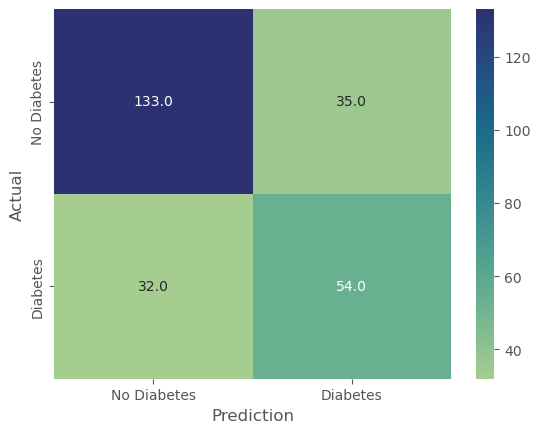

In [64]:
cma = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cma, annot=True,fmt=".1f", xticklabels=["No Diabetes",'Diabetes'], yticklabels=['No Diabetes','Diabetes'],
                cbar=True,cmap='crest')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')


- Total in dataframe(Diabetes)=86
    - ***wrong prediction=33***
- Total in dataframe(No Diabetes)=168
    - ***wrong prediction=40***
    
 A carrefull approach can permit us to say the number of (1) outcomes are thery low so the model can't predict accuratly this category of persons 

In [ ]:
print(y_test.shape)

In [ ]:
print(y_pred.shape)


## Compare Tested outcoume(Real value from the databaframe ) and Predicted outcome(value found by neural net model)

In [48]:
y_test = y_test.reshape(len(y_test), 1)
y_pred = y_pred.reshape(len(y_pred), 1)
print(np.concatenate((y_test[100:110], y_pred[100:110]), axis=1))

[[0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]]


##### Globaly we can see for 10 value the neural net  makes 3 mistakes on the outcome.That mean for 10 diabetes predictions about 3 will be wrong.

## Show a global classification report

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.79      0.80       168
           1       0.61      0.63      0.62        86

    accuracy                           0.74       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254



##### Here you can see the precision is 63 for Diabetic(1) and 80for non Diabetics(0) determiation

## Visualize Model Training History by creating plots

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


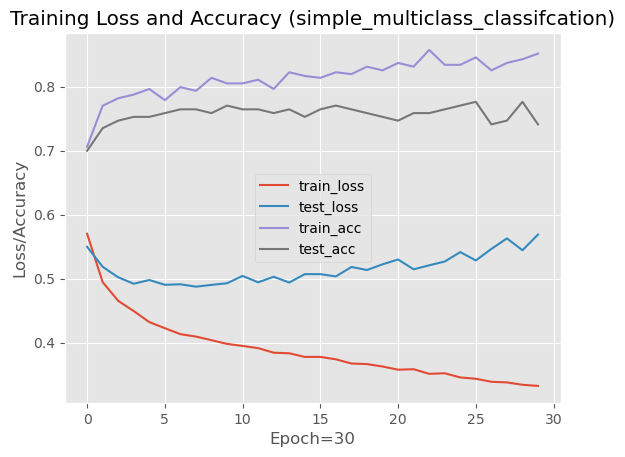

In [65]:
from tensorflow.keras.layers import Dense
print(H.history.keys())
# plot the training loss and accuracy for each epoch
N = np.arange(0, 30)
plt.style.use("ggplot")
plt.plot(N, H.history['loss'], label="train_loss")
plt.plot(N, H.history["val_loss"], label="test_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="test_acc")
plt.title("Training Loss and Accuracy (simple_multiclass_classifcation)")
plt.xlabel("Epoch=30")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("training_performance.png")

##### It helps us to access the history that at what point of the training(Epoch) the lossand  accuracy was decreasing or increasing. This will help us to analyse the perfermance of the model.I is saved it  an image “training_performance.png”.